# Hierarchical

The idea behind hierarchical clustering is to organize all the sample points into a tree structure called a **dendrogram**. At the root of the tree is the entire sample set, while each leaf of the tree is a single sample vector. Groups of similar samples are connected as nearby relatives in the tree, with less-similar groups located as more distant relatives.

Dendrograms can be found by starting with the root and recursively splitting, or by starting at the leaves and recursively merging. We will describe the latter approach, known as **agglomerative clustering**.

The algorithm begins with $n$ singleton clusters, i.e., $C_i=\{\bfx_i\}$. Then, the similarity or distance between each pair of clusters is determined. The pair with the minimum distance is merged, and the process repeats. 

Common ways to define the distance between two clusters $C_i$ and $C_j$ are:

* **Ward linkage**: increase in inertia by merging them
* **single linkage** or *minimum linkage*: $\displaystyle \min_{\bfx\in C_i,\,\bfy\in C_j} \{ \norm{\bfx-\bfy } \}$
* **complete linkage** or *maximum linkage*: $\displaystyle \max_{\bfx\in C_i,\,\bfy\in C_j} \{ \norm{\bfx-\bfy} \}$
* **average linkage**: $\displaystyle \frac{1}{|C_i|\,|C_j|} \sum_{\bfx\in C_i,\,\bfy\in C_j} \norm{ \bfx-\bfy }$

Absent any other considerations, Ward linkage is probably the most reliable (and is the sklearn default).
## Toy example

Let's use 5 sample points in the plane.

In [1]:
from sklearn.metrics import pairwise_distances
import numpy as np

X = np.array([[-2,-1],[1,-1],[1,0],[0,2],[-1,0]])
D2 = pairwise_distances(X,metric="euclidean")
D2

array([[0.        , 3.        , 3.16227766, 3.60555128, 1.41421356],
       [3.        , 0.        , 1.        , 3.16227766, 2.23606798],
       [3.16227766, 1.        , 0.        , 2.23606798, 2.        ],
       [3.60555128, 3.16227766, 2.23606798, 0.        , 2.23606798],
       [1.41421356, 2.23606798, 2.        , 2.23606798, 0.        ]])

The minimum value in the lower triangle of the distance matrix is in row 2, column 1 (starting index at 0). So our first merge results in the set $C_1=\{\bfx_1,\bfx_2\}$. If we use single linkage, then the linkages between this set and the other sample points are

In [2]:
from numpy.linalg import norm
C1 = X[[1,2]]
for x in X[[0,3,4]]:
    print(min(norm(x-y) for y in C1))

3.0
2.23606797749979
2.0


Comparing these to the pairwise point distances already calculated, the minimum value is 1.414, between points 0 and 4. So we now have clusters $C_1$, $C_2=\{bfx_0,\bfx_4\}$, $\{x_3\}$, and three pairwise linkages to compare, etc. The entire dendrogram can be visualized with seaborn:

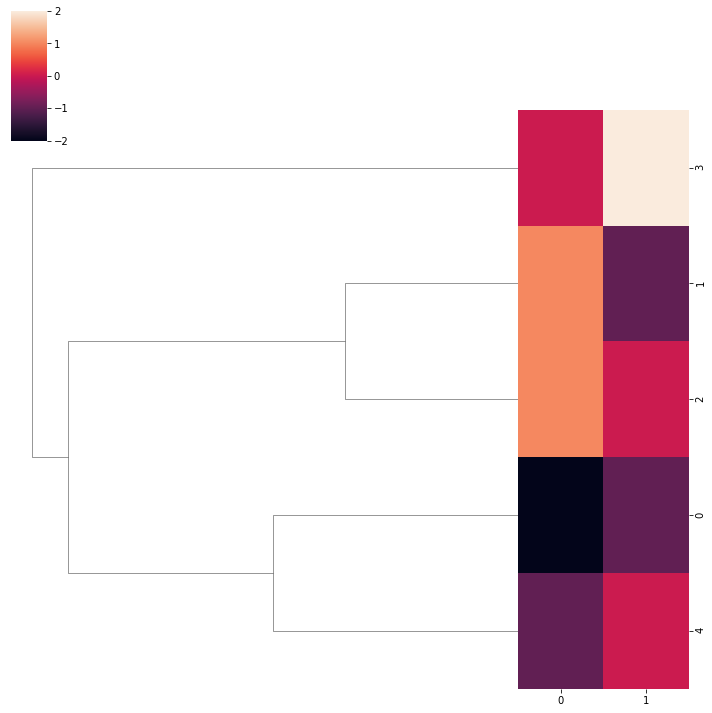

In [3]:
import seaborn as sns
sns.clustermap(X,col_cluster=False,dendrogram_ratio=(.75,.15))

The horizontal position in the dendrogram above indicates the linkage strength. Working from right to left, we see the creation of $C_1$ first, then $C_2$. These are merged into a single set before finally being merged with $\bfx_3$. (Note that the rows are reordered according to the values on the far right.)

In effect, we get an entire family of clusterings, by stopping at any linkage value we want. If we chose to stop at value 1.5, for instance, we would have the three clusters we derived above. Or, if we predetermine that we want $k$ clusters, we can stop after $n-k$ merges. 

## Case study: Penguins

Haven't found one yet where it works well.

In [4]:
import seaborn as sns
penguins = sns.load_dataset("penguins").dropna()
X = penguins[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]

In [5]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3,linkage="single")
agg.fit(X)
penguins["agg"] = agg.labels_

print("single linkage:")
print(penguins["agg"].value_counts())

single linkage:
0    331
2      1
1      1
Name: agg, dtype: int64


In [6]:
agg = AgglomerativeClustering(n_clusters=3,linkage="ward")
agg.fit(X)
penguins["agg"] = agg.labels_

print("Ward linkage:")
print(penguins["agg"].value_counts())

Ward linkage:
1    138
0    112
2     83
Name: agg, dtype: int64


In [7]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(penguins["species"],agg.labels_)

0.4000457098789099